##  Role of Momentum in Stock Price Movement

Picking the right stocks at right time is key to successful investment. There are great number of factors to consider for picking a stock. Here, we ask a simple question. **How big a role momentum plays in stock price movement?** If a stock has moved up (down) from its price *N* days ago, what is the chance that it will continue to raise (fall)? What is the ideal *N* value?

We consider the stock prices of four big corporations from four sectors (Apple – Tech, Exon – Energy, GM – Automobile and Bank of America – Finance) over a period of 17 years (2000–2016). 

To start with, we make the case as simple as possilbe. We assume buying and selling of stocks are done at the beginning and the end of the day, respectively, and ignore the price variation within a day. We also consider whether the stock  has soared (or fallen) from the price *N* days ago, and ignore fluctuations within this *N* days. In future we may include the effect of those fluctuations. The stock prices are accessed via Quandl API. 

In [2]:
#import libraries
%matplotlib inline
import quandl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [10]:
#quandl private key for large downloads. 
#Its hidden here for obvious reasons
quandl.ApiConfig.api_key = "VzW1VZyP5zAHZ87C_bQe"

In [127]:
#data scraping from Quandl. Quandl returns a Pandas dataframe, which is saved as df
# First let's access Apple prices
df = quandl.get('WIKI/AMZN', start_date='2000-01-01', end_date='2016-12-31')
print(df.shape)

(4266, 12)


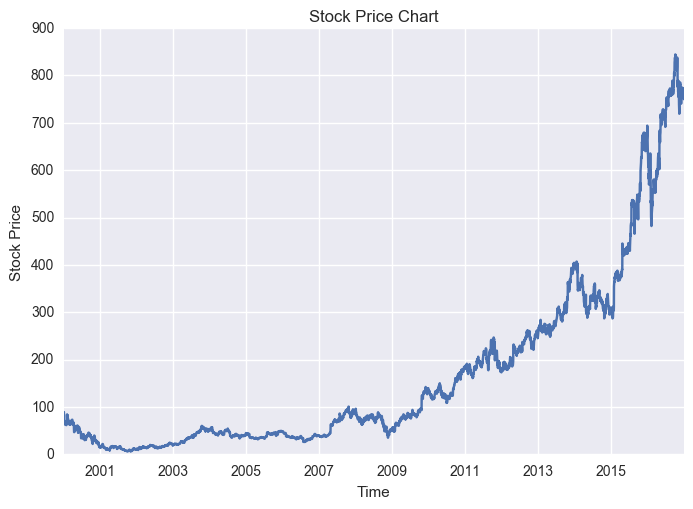

In [128]:
#plotting Adj. Close values 
plt.plot(df['Adj. Close'])
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Chart')

Many stocks are split when their prices go high. When a stock is split in to N stocks, its value drops by the same factor N. This is very inconveient for analysis. 'Adj' values are adjusted to stock splitting, so that we don't have to worry about such discontinuities. We thus keep only 'Adj.' values and delete the rest.

In [129]:
df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Split Ratio', 'Ex-Dividend',\
         'Adj. High', 'Adj. Low', 'Adj. Volume'], axis=1, inplace=True)
df.head()

,Adj. Open,Adj. Close
Date,,
2000-01-03,81.50,89.38
2000-01-04,85.38,81.94
2000-01-05,70.50,69.75
2000-01-06,71.31,65.56
2000-01-07,67.00,69.56


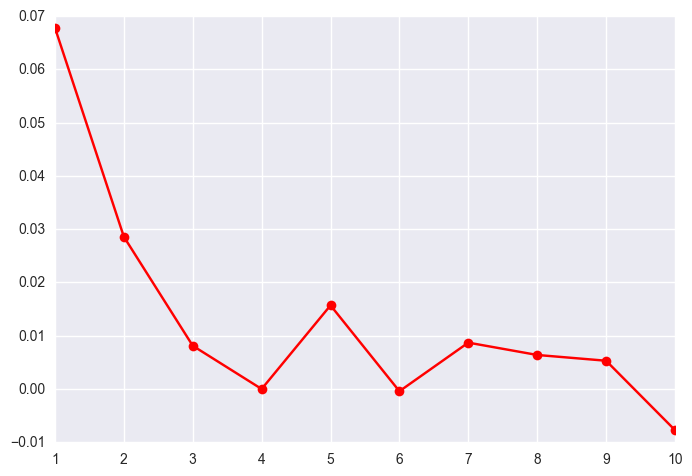

In [139]:
corr =[]
dtList = list(range(1,11))

for dN in dtList: 
    df['ShiftAdjOpen'] = df['Adj. Open'].shift(dN)
    df['1DayChange'] = df['Adj. Close']-df['Adj. Open']
    df['Shift1DayChange'] = df['1DayChange'].shift(-1)
    df['NDaysChange'] = df ['Adj. Close']-df['ShiftAdjOpen']
    df.drop(['1DayChange', 'ShiftAdjOpen'], axis=1, inplace=True)
    corr.append(np.corrcoef(df.dropna()['NDaysChange'], df.dropna()['Shift1DayChange'])[0][1])
df.tail(10)

plt.plot(dtList, corr, 'ro-', label='AAPL')
#corr

array([[ 1.       ,  0.0156978],
       [ 0.0156978,  1.       ]])

In [24]:
# checking for any missing data
df.isnull().sum()

Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

Quandl provides clean data, so we do not really have to do it. 
But its a good practice to look at the data for missing values.

### Price Change within a day and within N past days

In [29]:
# stock price change within a day = close price - open price
## change direction is +1 or -1 depending on whether price 
## increased or decreased on the day.

df['1DayChange'] = df['Adj. Close']-df['Adj. Open']

Calculate the correlation between changes within a day ('today') and changes in the last *N* days. We vary N=1 to 30. 

In [41]:
corr =[]
dtList = list(range(4,5))
for dt in dtList:
    df['shift'] = df['Adj. Close'].shift(dt)
    df['NDayChange'] = df['Adj. Close']-df['shift']
    corr.append(np.corrcoef(df.dropna()['1DayChange'], df.dropna()['NDayChange'])[0][1])

In [42]:
df.head(10)


,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,shift,1DayChange,NDayChange
Date,,,,,,,,
2000-01-03,26.791299,27.212546,26.245363,26.390272,13458200.0,NaN,-0.401027,NaN
2000-01-04,26.076864,26.349832,25.780306,25.884776,14510800.0,NaN,-0.192089,NaN
2000-01-05,26.285803,27.549543,26.221773,27.296795,17485000.0,NaN,1.010992,NaN
2000-01-06,27.168736,28.917753,27.023827,28.708814,19461600.0,NaN,1.540078,NaN
2000-01-07,28.961563,29.066032,28.307787,28.624565,16603800.0,26.390272,-0.336997,2.234293
2000-01-10,28.371817,28.516726,28.159509,28.223538,8545400.0,25.884776,-0.148279,2.338762
2000-01-11,28.223538,28.729034,28.179728,28.307787,8722600.0,27.296795,0.084249,1.010992
2000-01-12,28.055039,28.435847,27.906761,28.139289,10314200.0,28.708814,0.084249,-0.569526
2000-01-13,28.139289,28.981782,28.011230,28.793064,12056000.0,28.624565,0.653775,0.168499


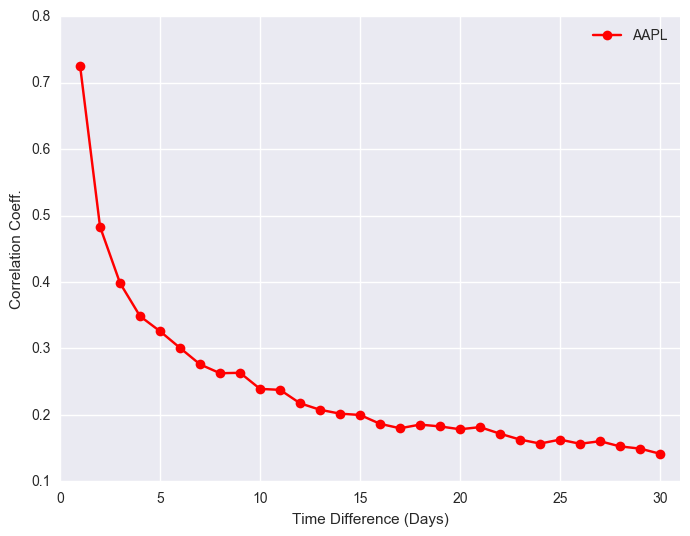

In [17]:
plt.figure(figsize=(8,6))
plt.plot(dtList, corr, 'ro-', label='AAPL')
plt.xlabel('Time Difference (Days)')
plt.ylabel('Correlation Coeff.')
plt.xlim(0, 31)
plt.legend()

So for Apple stocks, the price change within a day is strongly correlated with the price changes in the past few days. But is it generally true, or only for Apple? We consider three other large corporations in the following. 

In [16]:
CorrList=[]
#CorrList.append(corr)
TickList =['AAPL','BAC', 'GM', 'XOM']
for tick in TickList:
    df = quandl.get('WIKI/'+tick, start_date='2000-01-01', end_date='2016-12-31')
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Split Ratio', 'Ex-Dividend'], axis=1, inplace=True)
    df['DayChange'] = df['Adj. Close']-df['Adj. Open']
    corr =[]
    dtList = list(range(1,5))
    for dt in dtList:
        df['shift'] = df['Adj. Close'].shift(dt)
        df['dtChange'] = df['Adj. Close']-df['shift']
        corr.append(np.corrcoef(df.dropna()['DayChange'], df.dropna()['dtChange'])[0][1])
    CorrList.append(corr)
    


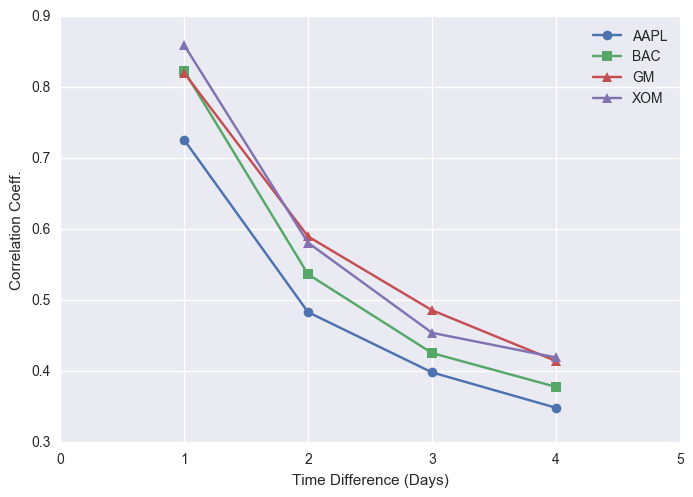

In [17]:
#plot the correlation
plt.plot(dtList, CorrList[0], 'o-', label=TickList[0] )
plt.plot(dtList,CorrList[1],'s-', label=TickList[1])
plt.plot(dtList, CorrList[2],'^-', label=TickList[2])
plt.plot(dtList, CorrList[3],'^-', label=TickList[3])

plt.legend()
plt.xlim(0,5)
plt.xlabel('Time Difference (Days)')
plt.ylabel('Correlation Coeff.')


So the general tend exists for all the four tickers that we chose. 

## Conclusions

* The momentum is indeed a big factor deciding the stock price movement. 
* We consider only the correlation between previous price change and "today's" price change. This means that soaring stocks, picked proportional to the percentage of price change would yield profits. However, it is unlikely that such a simple strategy will produce large profits.
* In future, we will consider fluctuations within the last *N* days. 
* We may also test our prediction by making an investment strategy of picking stocks based on the momentum and comparing their performance against control stocks. We will then examine whether there is a statistically significant difference between the two.
